In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 9.4MB/s 


In [ ]:
import pandas as pd
import numpy as np
import pydicom
import glob

In [ ]:
#mydicoms = glob.glob("*.dcm")

In [ ]:
mydicom = "/content/drive/MyDrive/AI Girls/AI Wonder Girls - Medical Imaging/Resources/university-hospital-basel/wrist_fracture_no/Anonymous^01539^^^_1_Handgelenkrechts_1_XHandgelenkaprechts/00000001.dcm"

In [ ]:
dcm1 = pydicom.dcmread(mydicom)

In [ ]:
dcm1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 228
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.17.1.8.8.7683.1.9.14.87633.76.859568849659048235
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_361'
(0002, 0016) Source Application Entity Title     AE: 'AE_ARCH2_4PR'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '', 'RAD']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID  

In [ ]:
dcm1.BodyPartExamined

'HAND'

In [ ]:
dcm1.StudyDescription

'Handgelenk rechts'

In [ ]:
dcm1.PatientSex

'M'

In [ ]:
dcm1.PatientAge

'055Y'

In [ ]:
IMG_DIR = "/content/drive/MyDrive/AI Girls/ai_wonder_girls_medical_imaging/Resources/university-hospital-basel/"

In [ ]:
mydicoms = glob.glob(IMG_DIR + "*/*/*.dcm")

In [ ]:
mydicoms

In [ ]:
dcm.PatientAge[1:3]

'82'

In [ ]:
all_data = []

for i in mydicoms: 
    dcm = pydicom.dcmread(i)
    fields = [dcm.PatientID, int(dcm.PatientAge[1:3]), dcm.PatientSex, dcm.Modality, dcm.StudyDescription,
             dcm.Rows, dcm.Columns]
    all_data.append(fields)

In [ ]:
mydata = pd.DataFrame(all_data, 
                      columns = ['PatientID','PatientAge','PatientSex','Modality','Findings','Rows','Columns'])

In [ ]:
mydata.head()

,PatientID,PatientAge,PatientSex,Modality,Findings,Rows,Columns
0,e0ac71efecc68f3435d8ab6ffc,82,F,CR,Handgelenk rechts,1702,1456
1,e0ac71efecc68f3238d0a160fd,58,F,CR,Handgelenk beidseits,1551,872
2,e0ac71efecc68f3236d8a06dfe,50,M,CR,Handgelenk links,2052,1072
3,e0ac71efecc68f3739d0a36afd,44,M,CR,Handgelenk links,1862,1280
4,e0ac71efecc68f3734d1a368fc,47,F,CR,Handgelenk links,2162,880


Check [this link](https://pydicom.github.io/pydicom/stable/old/viewing_images.html) to know a bit more about the pydicom library.

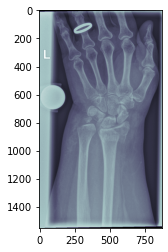

In [ ]:
import matplotlib.pyplot as plt
import pydicom

ds = pydicom.dcmread(mydicoms[1])
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [ ]:
mydata.iloc[1]

PatientID     e0ac71efecc68f3238d0a160fd
PatientAge                            58
PatientSex                             F
Modality                              CR
Findings            Handgelenk beidseits
Rows                                1551
Columns                              872
Name: 1, dtype: object

In [ ]:
mydata.to_csv("Challenge5_dicom_info.csv")